In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import time

Load and preprocess the data.

In [3]:
data_original = np.loadtxt('stanford_dl_ex/ex1/housing.data')

In [4]:
data = np.insert(data_original, 0, 1, axis=1)

In [5]:
np.random.shuffle(data)

Create train & test sets.

In [6]:
train_X = data[:400, :-1]
train_y = data[:400, -1]

test_X = data[400:, :-1]
test_y = data[400:, -1]

In [7]:
m, n = train_X.shape

Define the cost function and how to compute the gradient.<br>
Both are needed for the subsequent optimization procedure.

In [8]:
def cost_function(theta, X, y): 
    squared_errors = (X.dot(theta) - y) ** 2
    J = 0.5 * squared_errors.sum()
    return J

In [9]:
def gradient(theta, X, y):
    errors = X.dot(theta) - y
    return errors.dot(X)

Run a timed optimization and store the iteration values of the cost function (for latter investigation).

In [10]:
J_history = []

t0 = time.time()
res = scipy.optimize.minimize(
    fun=cost_function,
    x0=np.random.rand(n),
    args=(train_X, train_y),
    method='bfgs',
    jac=gradient,
    options={'maxiter': 200, 'disp': True},
    callback=lambda x: J_history.append(cost_function(x, train_X, train_y)),
)
t1 = time.time()

print('Optimization took {s} seconds'.format(s=t1 - t0))
optimal_theta = res.x

Optimization terminated successfully.
         Current function value: 3909.307674
         Iterations: 25
         Function evaluations: 34
         Gradient evaluations: 34
Optimization took 0.004139900207519531 seconds


It's always interesting to take a more detailed look at the optimization results.

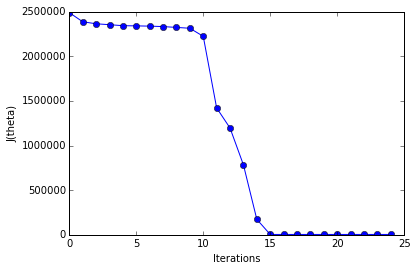

In [11]:
plt.plot(J_history, marker='o')
plt.xlabel('Iterations')
plt.ylabel('J(theta)')

Now compute the Root Mean Square Error on both the train and the test set and hopefully they are similar to each other. 

In [12]:
for dataset, (X, y) in (
    ('train', (train_X, train_y)),
    ('test', (test_X, test_y)),
):
    actual_prices = y
    predicted_prices = X.dot(optimal_theta)
    print(
        'RMS {dataset} error: {error}'.format(
            dataset=dataset,
            error=np.sqrt(np.mean((predicted_prices - actual_prices) ** 2))
        )
    )

RMS train error: 4.421146725707398
RMS test error: 5.638168304221702


Finally, let's have a more intuitive look at the predictions.

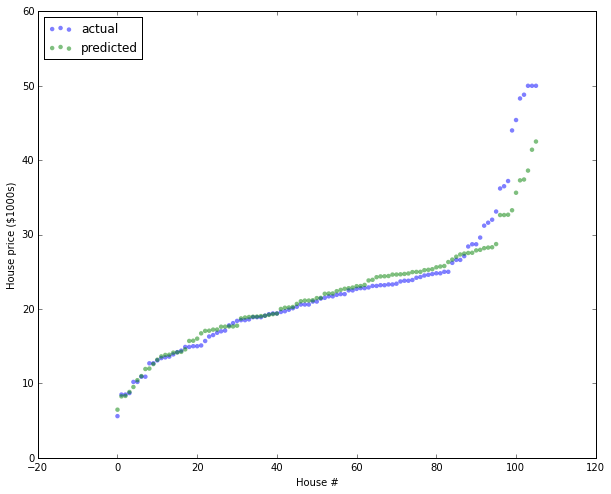

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(np.arange(test_y.size), sorted(test_y), c='b', edgecolor='None', alpha=0.5, label='actual')
plt.scatter(np.arange(test_y.size), sorted(test_X.dot(optimal_theta)), c='g', edgecolor='None', alpha=0.5, label='predicted')
plt.legend(loc='upper left')
plt.ylabel('House price ($1000s)')
plt.xlabel('House #')